# Yandex.Music

# Table of contents

I. General Information. Interim conclusions.  


II. Data preprocessing. Interim conclusions.    
 - Column headings processing  
 - Categorical data processing     
 - Numerical data processing   
 - Missing values processing    
 - Duplicates processing


III. Exploratory Data Analysis (EDA). Interim conclusions.  
 - User activity analysis during the week (in terms of cities) (1st hypothesis)  
 - User activity analysis during the day (in terms of cities) (2nd hypothesis)  
 - Preferred genres analysis (in terms of cities) (3rd hypothesis)      
    

IV. General conclusion.

# General Information <a id='id1'></a>

In [1]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pandas customization
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
# seaborn customization
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='pastel')

Displaying tables with borders:

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [5]:
# reading the file and saving it to the 'df' variable
pth1 = '\home\yuso\jupyter_dir\jupyter_env\datasets\yandex_music_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
else:
    print('Something is wrong')

In [6]:
# primary data analysis function
def get_info(df):
    '''The function takes a dataframe as an input and provides general information about it: dataframe shape (rows, columns),
    columns data type, number of non-null values (DataFrame.info()), first five rows (DataFrame.head(5)) and also brief 
    analysis for categorical and numerical data - DataFrame.describe().'''
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'Total number of rows: {df.shape[0]}, total number of columns: {df.shape[1]}.')
    print()
    print(df.info())
    display(df.head(5))
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [7]:
# applying get_info function
get_info(df)

Total number of rows: 65079, total number of columns: 7.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None


,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


,count,unique,top,freq
userID,65079,41748,A8AE9169,76
Track,63848,47245,Intro,34
artist,57876,43605,Sasha,6
genre,63881,289,pop,8850
City,65079,2,Moscow,45360
time,65079,20392,08:14:07,14
Day,65079,3,Friday,23149


**According to the documentation::**  

* `userID` — unique user identifier;
* `Track` — song name;  
* `artist` — song artist;
* `genre` — song genre;
* `City` — user's location;
* `time` — start of listening;
* `Day` — day of the week.   

**Brief data analysis:**  

* there are missing values in `Track`, `artist` and `genre` columns;
* column names issues:     
    1) combined lower and uppercase letters;  
    2) spaces before and after column names;      
    3) multiple word variables not in 'snake case' style;    
* categorical data also contains combined lower and uppercase letters which implies possible implicit duplicates in it (lowercase transformation is needed);

## Interim conclusions<a id='id11'></a>   

Each row of the table contains data about the song. Some columns describe the song itself: its name, artist and genre. Other columns contain information about the user: ID, location and listening time.   
  
There are 65079 rows in data: 41748 unique users. The most active user has *A8AE9169* ID (occurs 76 times). Number of unique track names - 47245, unique artists - 43605, genres - 289 (such value of unique genres implies implicit duplicates in the data).   
The data was provided for 3 specific days of the week (Monday, Wednesday, Friday - most common one, 23149 records ) for Moscow (45360 records) and St.Petersburg.

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to check and remove duplicates, process missing values, transform categorical values into lowercase. 

# Data preprocessing <a id='id2'></a>


## Column headings processing <a id='id21'></a>

In this section we'll change column headings that do not meet naming conventions in Python.

In [8]:
# selecting column names
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [9]:
# renaming columns
df = df.rename(
    columns = {
    '  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day'})

In [10]:
# check
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

## Categorical data processing <a id='id23'></a>

In this section we'll transform all categorical data into the lowercase letters (`str.lower()` method). To process all columns at once we will use `apply` method (apply a function along an axis of the DataFrame).     

Also we'll check unique values in `city` and `day` columns.

In [11]:
# selecting required columns 
obj_cols_list = ['track', 'artist', 'city', 'day', 'genre']

In [12]:
# lowercase transformation
df = df.apply(lambda x: x.str.lower() if x.name in obj_cols_list else x)

In [13]:
# check
df.head(5)

,user_id,track,artist,genre,city,time,day
0,FFB692EC,kamigata to boots,the mass missile,rock,saint-petersburg,20:28:33,wednesday
1,55204538,delayed because of accident,andreas rönnberg,rock,moscow,14:07:09,friday
2,20EC38,funiculì funiculà,mario lanza,pop,saint-petersburg,20:58:07,wednesday
3,A3DD03C9,dragons in the sunset,fire + ice,folk,saint-petersburg,08:37:09,monday
4,E2DC1FAE,soul people,space echo,dance,moscow,08:34:34,monday


In [14]:
# unique values in `day` column
df['day'].unique()

array(['wednesday', 'friday', 'monday'], dtype=object)

In [15]:
# unique values in `city` column
df['city'].unique()

array(['saint-petersburg', 'moscow'], dtype=object)

## Numerical data processing <a id='id24'></a>

In this section we'll check min and max time values.

In [16]:
# max and min listening time check
print(f'Min time: {df["time"].min()}')
print(f'Max time: {df["time"].max()}')

Min time: 08:00:00
Max time: 22:00:59


## Missing values processing <a id='id26'></a>

In [17]:
# missing values calculation
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
report.style.background_gradient('coolwarm')

,missing_values,% of total
user_id,0,0.000000
track,1231,1.890000
artist,7203,11.070000
genre,1198,1.840000
city,0,0.000000
time,0,0.000000
day,0,0.000000


Not all of the missing values affect the outcomes of analysis. The missing values in `track` and `artist` columns are not important for our research. It will be enough to replace them with common word ('unknown' for example).     
The missing values in `genre` column prevent the musical preferences research. The reason should be established and the data should be recovered. But we don't have such option in this project. So we'll fill all of the missing values with 'unknown'.

In [18]:
# missing values replacement
columns_to_replace = ['track', 'artist', 'genre']
for col in columns_to_replace:
    df[col] = df[col].fillna('unknown')  

In [19]:
# check
report = df.isna().sum().to_frame()s
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
report.style.background_gradient('coolwarm')

,missing_values,% of total
user_id,0,0.000000
track,0,0.000000
artist,0,0.000000
genre,0,0.000000
city,0,0.000000
time,0,0.000000
day,0,0.000000


## Duplicates processing <a id='id27'></a>

In this section we'll find and remove all duplicates. Also we'll check `genre` column for implicit duplicates (the same name of the same genre can be recorded in some different way). To find this duplicates we'll write a new function that will be count the Levenschtein distance between genre names.

In [20]:
# duplicates calculation
df.duplicated().sum()  

3826

In [21]:
# duplicates deleting
df = df.drop_duplicates().reset_index(drop=True)

In [22]:
# check
df.duplicated().sum()

0

In [23]:
# unique genres
sorted_df = df.sort_values(by='genre')
sorted_df['genre'].unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [24]:
# similar words search function
def similar(df, column):
    '''The function takes a dataframe and a column name as an input, selects unique values from the column and returns couples
    of words with Levenschtein distance > 75.'''
    lst = df[column].dropna().unique().tolist()
    for i in range (len(lst) - 1):
        for j in range(i, len(lst) - 1):
            ratio = fuzz.token_sort_ratio(lst[i], lst[j])
            if ratio > 75 and i != j:
                print(lst[j], lst[i])

In [25]:
# applying the function to the 'genre' column
similar(df, 'genre')

jpop pop
dancepop dance
popdance dance
loungeelectronic electronic
popelectronic electronic
alternativepunk alternative
rockalternative alternative
nujazz jazz
latino latin
classicmetal classical
numetal metal
reggaeton reggae
türkçe türk
nujazz conjazz
hardcore posthardcore
vocal local
tech techno
entehno techno
christian christmas
chanson shanson
eastern western
cuban urban
romance trance
animated anime
poprussian russian
other southern
hip-hop hiphop
triphop hiphop
epicmetal experimental
inspirational international
newwave newage
deutschspr deutschrock
popdance popeurodance
popelectronic loungeelectronic


We've found implicit duplicates. To clear the data from it we'll write one more function.

In [26]:
# duplicates replacing function
def replace_wrong_genres(wrong_genres, correct_genre):
    '''The function takes incorrect genre names as an input (wrong_genres parameter). Replaces each incorrect value with the value in correct_genre variable.'''
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

In [27]:
# implicit duplicates removing
duplicates = ['hip', 'hop', 'hip-hop']
right_name = 'hiphop' 
replace_wrong_genres(duplicates, right_name)

In [28]:
# removing other duplicates
df['genre'] = df['genre'].replace('электроника', 'electronic')
df['genre'] = df['genre'].replace('türkçe', 'türk')
df['genre'] = df['genre'].replace('latino', 'latin')
df['genre'] = df['genre'].replace('tech', 'techno')
df['genre'] = df['genre'].replace('shanson', 'chanson')

In [29]:
# removing incorrect genre names
df['genre'] = df['genre'].replace('ïîï', 'unknown')

In [30]:
# check
sorted_df = df.sort_values(by='genre')
print(sorted_df['genre'].unique())
print()
similar(df, 'genre')

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

## Interim conclusions <a id='id25'></a>   

In this section we've:
* edited some of the column headings according to the naming conventions in Python;   
* found and deleted duplicates;
* edited implicit duplicates (lowercase transformartion) in musical genres;
* analysed numeric data - min and max values in time column;
* found and filled missing values in the data;

# Exploratory Data Analysis (EDA) <a id='id3'></a>

## User activity analysis during the week (in terms of cities) <a id='id31'></a>

*Hypothesis: User activity depends on the day of the week. Moreover, in Moscow and St. Petersburg it differs.*    

We'll check this hypothesis with Monday's, Wednesday's and Friday's data.

Our steps:
* we'll split users from Moscow and St.Petersburg;
* we'll compare how many tracks each group have listened depending on the day of the week; 

In [31]:
# listening count function
def number_tracks(day, city):  
    '''The function takes day of the week and city as an input, then filters dataframe according the specified
    values, counts and returns number of unique ID (is equivalent to the listened tracks).'''
    track_list = df[df['day'] == day]
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Get data for each city in each of the days.

In [32]:
print(f'Monday. {number_tracks("monday", "moscow")} tracks listened in Moscow.')
print(f'Monday. {number_tracks("monday", "saint-petersburg")} tracks listened in Saint-Petersburg.')

Monday. 15740 tracks listened in Moscow.
Monday. 5614 tracks listened in Saint-Petersburg.


In [33]:
print(f'Wednesday. {number_tracks("wednesday", "moscow")} tracks listened in Moscow.')
print(f'Wednesday. {number_tracks("wednesday", "saint-petersburg")} tracks listened in Saint-Petersburg.')

Wednesday. 11056 tracks listened in Moscow.
Wednesday. 7003 tracks listened in Saint-Petersburg.


In [34]:
print(f'Friday. {number_tracks("friday", "moscow")} tracks listened in Moscow.')
print(f'Friday. {number_tracks("friday", "saint-petersburg")} tracks listened in Saint-Petersburg.')

Friday. 15945 tracks listened in Moscow.
Friday. 5895 tracks listened in Saint-Petersburg.


Users from Moscow have listened more tracks than users from St.Petersburg. But it does not mean that Moscow users are more active because Moscow's population is much larger.       
On average users are less active on Wednesdays. But the situation may change if we consider each city individually. 

In [35]:
# creating table with results
columns = ['City', 'Monday', 'Wednesday', 'Friday']
data = [['Moscow', 15740, 11056, 15945], ['Saint-Petersburg', 5614, 7003, 5895]]
results = pd.DataFrame(data=data, columns=columns)
display(results)

,City,Monday,Wednesday,Friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


## User activity analysis during the day (in terms of cities)  <a id='id32'></a>

*Hypothesis: оn Monday mornings, certain genres prevail in Moscow, while others prevail in St. Petersburg. The same goes for Friday evenings, depending on the city.*

For this task we'll split the users from Moscow and St.Petersburg and create a new function that returns top 10 musical genres depending on the day of the week and the time range. Then we'll compare the most popular genres in two cities on Monday mornings and Friday evenings. Also we'll create pie charts based on our results. 

In [36]:
# Moscow data
moscow_general = df[df['city'] == 'moscow']

In [37]:
# Saint-Petersburg data
spb_general = df[df['city'] == 'saint-petersburg']

In [38]:
# top 10 musical genres function
def genre_weekday(table, day, time1, time2):
    """The function takes the dataframe, a day of thr week and two timestamps (initial and final) as an input. Filters dataframe's rows according to the specified parameters, than groups the data based on musical genres, counts unique user IDs for each genre and returns a dataframe with top 10 most popular genres. """
    genre_df = table[table['day'] == day]
    genre_df = genre_df[genre_df['time'] > time1]
    genre_df = genre_df[genre_df['time'] < time2]
    genre_df_count = genre_df.groupby('genre')['user_id'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted.head(10).to_frame()

In [39]:
# top 10 genres (Moscow, Monday 7-11 am.)
msk_morning = genre_weekday(moscow_general, 'monday', '07:00', '11:00')
msk_morning

,user_id
genre,
pop,781
dance,549
electronic,480
rock,474
hiphop,286
ruspop,186
world,181
rusrap,175
alternative,164


No handles with labels found to put in legend.


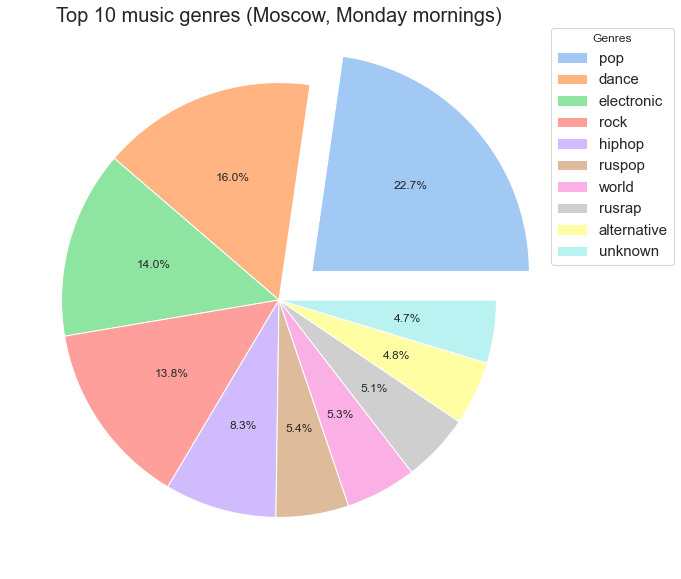

In [40]:
# top 10 genres (Moscow, Monday 7-11 am.) pie chart
msk_morning.plot.pie(subplots=True, autopct='%.1f%%', explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels=None)
plt.title('Top 10 music genres (Moscow, Monday mornings)', fontsize=20)
plt.legend(title='Genres', fontsize=15, labels=msk_morning.index, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('');

In [41]:
# top 10 genres (St.Petersburg, Monday 7-11 am.)
spb_morning = genre_weekday(spb_general, 'monday', '07:00', '11:00')
spb_morning

,user_id
genre,
pop,218
dance,182
rock,162
electronic,147
hiphop,80
ruspop,64
alternative,58
rusrap,55
jazz,44


No handles with labels found to put in legend.


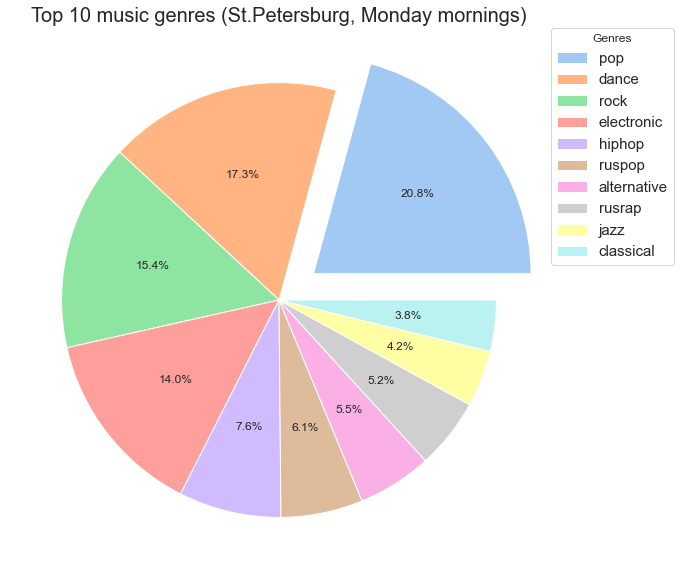

In [42]:
# top 10 genres (St.Petersburg, Monday 7-11 am.) pie chart
spb_morning.plot.pie(subplots=True, autopct='%.1f%%', explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels=None)
plt.title('Top 10 music genres (St.Petersburg, Monday mornings)', fontsize=20)
plt.legend(title='Genres', fontsize=15, labels=spb_morning.index, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('');

In [43]:
# top 10 genres (Moscow, Friday 5-11 pm.)
msk_evenings = genre_weekday(moscow_general, 'friday', '17:00', '23:00')
msk_evenings

,user_id
genre,
pop,713
rock,517
dance,495
electronic,482
hiphop,273
world,208
ruspop,170
alternative,163
classical,163


No handles with labels found to put in legend.


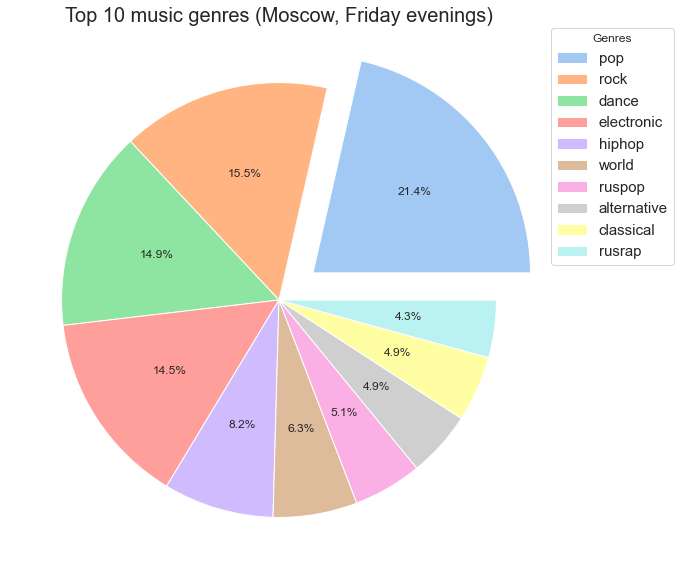

In [44]:
# top 10 genres (Moscow, Friday 5-11 pm.) pie chart
msk_evenings.plot.pie(subplots=True, autopct='%.1f%%', explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels=None)
plt.title('Top 10 music genres (Moscow, Friday evenings)', fontsize=20)
plt.legend(title='Genres', fontsize=15, labels=msk_evenings.index, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('');

In [45]:
# top 10 genres (St.Petersburg, Friday 5-11 pm.)
spb_evenings = genre_weekday(spb_general, 'friday', '17:00', '23:00')
spb_evenings

,user_id
genre,
pop,256
rock,216
electronic,216
dance,210
hiphop,97
alternative,63
jazz,61
classical,60
rusrap,59


No handles with labels found to put in legend.


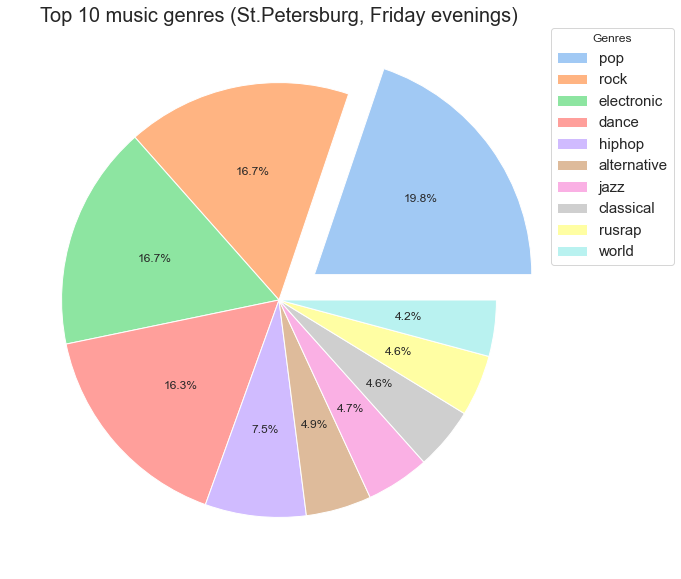

In [46]:
# top 10 genres (St.Petersburg, Friday 5-11 pm.) pie chart
spb_evenings.plot.pie(subplots=True, autopct='%.1f%%', explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels=None)
plt.title('Top 10 music genres (St.Petersburg, Friday evenings)', fontsize=20)
plt.legend(title='Genres', fontsize=15, labels=spb_evenings.index, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('');

## Preferred genres analysis (in terms of cities) <a id='id34'></a>

*Hypothesis: people in Moscow and St. Petersburg prefer different genres: pop music is popular in Moskow, in St. Petersburg - Russian rap.*

We'll group our data on musical genres and count listened tracks (based on unique ID) for each genre (method `count`). Then we'll sort the result in descending order and save it in two variables - `moscow_genres` и `spb_genres`.

In [47]:
# the most popular genres in Moscow
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False).head(10).to_frame()
moscow_genres

,genre
genre,
pop,5892
dance,4435
rock,3965
electronic,3786
hiphop,2096
classical,1616
world,1432
alternative,1379
ruspop,1372


No handles with labels found to put in legend.


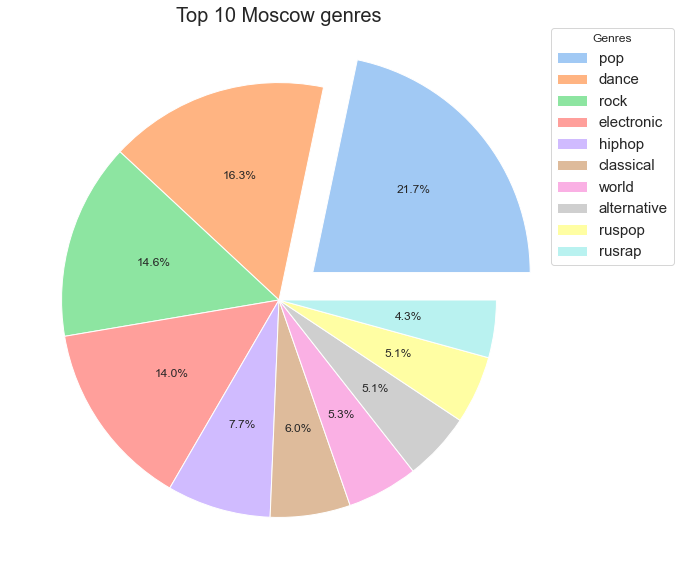

In [48]:
# the most popular genres in Moscow pie chart
moscow_genres.plot.pie(subplots=True, autopct='%.1f%%',  explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels=None)
plt.title('Top 10 Moscow genres', fontsize=20)
plt.legend(title='Genres', fontsize=15, labels=moscow_genres.index, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('')
plt.show();

In [49]:
# the most popular genres in St.Petersburg
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False).head(10).to_frame()
spb_genres

,genre
genre,
pop,2431
dance,1932
rock,1879
electronic,1737
hiphop,960
alternative,649
classical,646
rusrap,564
ruspop,538


No handles with labels found to put in legend.


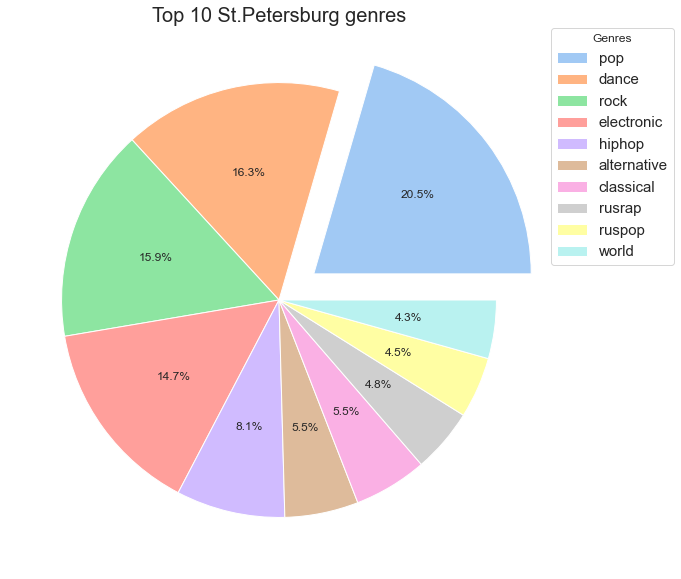

In [50]:
# the most popular genres in St.Petersburg pie chart
spb_genres.plot.pie(subplots=True, autopct='%.1f%%',  explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0), labels=None)
plt.title('Top 10 St.Petersburg genres', fontsize=20)
plt.legend(title='Genres', fontsize=15, labels=spb_genres.index, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('')
plt.show();

##  Interim conclusions <a id='id33'></a> 

### User activity depends on the day of the week (in terms of cities).

The data shows the difference in users' preferences:

- Users from Moscow are more active on Mondays and Fridays, on Wednesdays activity is lower.
- In St.Petersburg, on the contrary, users are more active on Wednesdays. Mondays and Fridays activity is a little bit lower than in Wednesdays.

So our data proves the first hypothesis.
______________________________

### Genres on Monday mornings and Friday evenings differ (in terms of cities).

* Users' preferences in Moscow and St.Petersburg are similar. The only difference appears in Moscow rating - 'world' genre, and in St.Petersburg - jazz and classical music. 
* There are many missing values in Moscow records - `unknown` value takes 10th place in top 10 genres. So the missing values represent a significant share in the data and threaten the credibility of the research.
* Friday evenings does not change the situation. Listening of some genres rises, others go down, but top 10 stays the same in general.

Thus, the second hypothesis was verified partially:
* Users listen similar music at the beginning and at the end of the week.
* The difference between Moscow and St. Petersburg is not distinct. In Moscow russian pop music is more popular, in St. Petersburg - jazz.

However, the missing values in the data call into the question this result. There are so many missing records in Moscow data that the top 10 ranking may have looked different in case we have full data.

_____________________________

### People in Moscow and St. Petersburg prefer different genres.

The third hypothesis was verified partially:
* Pop music is the most popular genre in Moscow as we've suggested. Moreover, in top 10 there is a similar genre - russian pop music.
* Contrary to our expectations, rap is popular in Moscow and St. Petersburg equally.


# General conclusion <a id='id7'></a> 

<div style="border:solid green 2px; padding: 20px">
    
In this project we we've worked as data analysts of Yandex Music platform. We've compared musical preferences of users in two megapolices - Moscow and St. Petersburg. Our data was provided by Yandex Music platform. It consists of user IDs and tracks they listened in Monday, Wednesday and Friday from 8:00 am. to 10:00 pm.
    
**The main points in data preprocessing:**
* editing some of the column headings according to the naming conventions in Python;
* search and deleting duplicates;
* search and editing implicit duplicates (lowercase transformartion) in musical genres;
* numeric data analysis;
* search and filling missing values.
    
We should note that the number of the missing values in `genre` column is 11.07%, which affects the results of the analysis (these records were filled in by 'unknown' value as it's not possible to restore the actual value).
    
**The first hypothesis check:**
    
*User activity depends on the day of the week. Moreover, in Moscow and St. Petersburg it differs.*
    
The data shows the difference in users' preferences:

* users from Moscow are more active on Mondays and Fridays;
* in St.Petersburg users are more active on Wednesdays.

The first hypothesis was proved.
    
**The second hypothesis check:**
    
*On Monday mornings, certain genres prevail in Moscow, while others prevail in St. Petersburg. The same goes for Friday evenings, depending on the city.*

* users listen similar music at the beginning and at the end of the week;
* in Moscow top rating appears 'world' genre, and in St.Petersburg - jazz and classical music;
* the missing values in Moscow data call into the question the results (11.07% of total);
* the difference between Moscow and St. Petersburg is not distinct.

The second hypothesis was verified partially.
    
**The third hypothesis check:**
    
*Hypothesis: people in Moscow and St. Petersburg prefer different genres: pop music is popular in Moscow, in St. Petersburg - Russian rap.*
    
* pop music is the most popular genre in Moscow;
* in top 10 Moscow genres there is a similar genre - russian pop music;
* rap genre is popular in Moscow and St. Petersburg equally.
    
The third hypothesis was verified partially.

However, it should be remembered that it is not possible to draw a final conclusion according to the data from only one service.